In [2]:
import torch

import time

import torchvision

import torch.nn as nn

import torch.optim as optim

import numpy as np

import matplotlib.pyplot as plt

from torchsummary import summary

In [3]:
x_train = np.load('x_train_2.npy')

y_train = np.load('y_train_2.npy')

x_test = np.load('x_test_2.npy')

y_test = np.load('y_test_2.npy')

In [4]:
M = 100

In [5]:
# transforming to training format

x_train = x_train.reshape(-1,1)

y_train = y_train.reshape(-1,1)

x_test = x_test.reshape(-1,1)

y_test = y_test.reshape(-1,1)

In [6]:
# All neural networks are subclasses of the nn.Module base class

class ANN(nn.Module):
    
    def __init__(self, input_dim = 1, output_dim = 1, num_layers = 3, num_nodes = 8):
        
        super().__init__() 
        
        self.num_nodes = num_nodes
        self.num_layers = num_layers
        
        self.input_layer = nn.Linear(input_dim,num_nodes)
        
        self.act_input  = nn.Tanh()
        
        self.hidden_layer_1 = nn.Linear(num_nodes, 2 * num_nodes)
        
        self.hidden_layer_2 = nn.Linear(2 * num_nodes, 2 * num_nodes)
                
        self.output_layer = nn.Linear(2 * num_nodes, output_dim)
        
        
    def forward(self, x):
        
        y = self.input_layer(x)
        
        y = self.act_input(y)
        y = self.hidden_layer_1(y)
        y = self.act_input(y)
        
        for i in range(self.num_layers):
            y = self.hidden_layer_2(y)
            y = self.act_input(y)
        
        y = self.output_layer(y)
        
        return y

In [7]:
# model visualisation

model = ANN(1, 1, 3, 3)

In [8]:
summary(model,(M,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 100, 3]               6
              Tanh-2               [-1, 100, 3]               0
            Linear-3               [-1, 100, 6]              24
              Tanh-4               [-1, 100, 6]               0
            Linear-5               [-1, 100, 6]              42
              Tanh-6               [-1, 100, 6]               0
            Linear-7               [-1, 100, 6]              42
              Tanh-8               [-1, 100, 6]               0
            Linear-9               [-1, 100, 6]              42
             Tanh-10               [-1, 100, 6]               0
           Linear-11               [-1, 100, 1]               7
Total params: 163
Trainable params: 163
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward

In [9]:
n_epochs = 5000

learning_rate = 1e-2

optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay = 1e-2) #adam optimizer

loss_fn = nn.MSELoss()

In [10]:
import time

def train_ann(n_epochs, model, optimizer, loss_fn, x_train, y_train, x_test, y_test):
    
    # converting arrays to tensors
    
    x_train_tensor = torch.from_numpy(x_train).float()
    
    x_test_tensor = torch.from_numpy(x_test).float()

    y_train_tensor = torch.from_numpy(y_train).float()
    
    y_test_tensor = torch.from_numpy(y_test).float()
       

    loss_train = np.zeros(n_epochs) #training for respective epochs
    
    loss_test  = np.zeros(n_epochs) #testing loss for respective epochs
    
    t0=time.time()
    
    print(t0)
    
    
    for epochs in np.arange(1, n_epochs+1):
        
        
        
        
        #Training
        
        #setting my model to training mode
        
        model.train() 
        
        # prediction
        
        pred = model(x_train_tensor)
        
        # loss
        
        loss = loss_fn(pred,y_train_tensor)
        
        #backward and optimize
            
        optimizer.zero_grad() #reseting gradients of all model parameters to 0
            
        loss.backward() #backward propagation step
            
        optimizer.step() #perform the optimization step
        
        
        loss_train[epochs-1] = loss.detach().numpy()
        
        
    #Testing
        
        #setting the model to evaluation mode
        
        model.eval()
        
        # prediction
        
        pred = model(x_test_tensor)
        
        # loss
        
        loss = loss_fn(pred,y_test_tensor)
        
        loss_test[epochs-1] = loss.detach().numpy()
        
#         print(epochs,loss_train[epochs-1],loss_test[epochs-1])
        
        # saving stuff
        
        np.save('loss_train.npy',loss_train[:epochs])
        
        np.save('loss_test.npy',loss_train[:epochs])
        
        torch.save(model.state_dict(),'model.pt')
        
      
    
    t1=time.time()
    
#     print(t1-t0)
    
    return loss_train, loss_test

In [10]:
train_ann(n_epochs = n_epochs , model = model , optimizer = optimizer, loss_fn = loss_fn, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test)

1725526587.176305
1 0.5731050372123718 0.5457581281661987
2 0.5501547455787659 0.5246583223342896
3 0.5323613882064819 0.5075767636299133
4 0.5189070701599121 0.49390703439712524
5 0.508969247341156 0.4831032156944275
6 0.5018649101257324 0.4747313857078552
7 0.49709293246269226 0.4684487283229828
8 0.4942605495452881 0.4639452397823334
9 0.49299338459968567 0.4608941078186035
10 0.4928779602050781 0.458936870098114
11 0.49344688653945923 0.45770448446273804
12 0.4942237138748169 0.45687928795814514
13 0.4948170781135559 0.4562552571296692
14 0.4949955642223358 0.4557529091835022
15 0.49469637870788574 0.45538824796676636
16 0.49398350715637207 0.45522427558898926
17 0.49299007654190063 0.4553239345550537
18 0.49186599254608154 0.45571833848953247
19 0.49073827266693115 0.4563903212547302
20 0.48968735337257385 0.45728054642677307
21 0.48873910307884216 0.458304226398468
22 0.48787400126457214 0.45937108993530273
23 0.48704469203948975 0.46039503812789917
24 0.48619353771209717 0.46129

213 0.4267537593841553 0.41471606492996216
214 0.4267513155937195 0.41473379731178284
215 0.4267488718032837 0.41474685072898865
216 0.4267464578151703 0.4147544503211975
217 0.4267440140247345 0.41476577520370483
218 0.42674171924591064 0.41478198766708374
219 0.42673933506011963 0.41479477286338806
220 0.4267370104789734 0.4148026406764984
221 0.4267347455024719 0.41481342911720276
222 0.42673248052597046 0.4148281514644623
223 0.42673030495643616 0.4148402810096741
224 0.42672812938690186 0.4148484766483307
225 0.42672598361968994 0.4148586690425873
226 0.42672398686408997 0.4148721694946289
227 0.4267219603061676 0.414883553981781
228 0.4267199635505676 0.4148918092250824
229 0.4267180263996124 0.4149017930030823
230 0.4267161190509796 0.4149143099784851
231 0.42671433091163635 0.4149250388145447
232 0.42671242356300354 0.41493329405784607
233 0.4267106354236603 0.41494306921958923
234 0.4267088770866394 0.4149547517299652
235 0.42670711874961853 0.4149647653102875
236 0.4267053604

423 0.4265193045139313 0.41583260893821716
424 0.42651844024658203 0.4158351421356201
425 0.426517516374588 0.41583770513534546
426 0.4265165627002716 0.4158400595188141
427 0.42651569843292236 0.41584253311157227
428 0.42651477456092834 0.4158450663089752
429 0.4265138506889343 0.41584739089012146
430 0.4265129566192627 0.41584983468055725
431 0.4265120327472687 0.4158523678779602
432 0.42651110887527466 0.4158547520637512
433 0.426510214805603 0.41585707664489746
434 0.4265092611312866 0.41585952043533325
435 0.4265083372592926 0.41586193442344666
436 0.4265073835849762 0.4158642888069153
437 0.4265064299106598 0.4158666729927063
438 0.42650550603866577 0.41586899757385254
439 0.42650455236434937 0.41587138175964355
440 0.42650362849235535 0.41587376594543457
441 0.42650267481803894 0.41587600111961365
442 0.4265017807483673 0.4158783555030823
443 0.4265008270740509 0.41588062047958374
444 0.4264998733997345 0.41588306427001953
445 0.4264989197254181 0.4158852994441986
446 0.42649799

713 0.42636147141456604 0.41623324155807495
714 0.4263613820075989 0.41623401641845703
715 0.42636123299598694 0.41623455286026
716 0.4263611137866974 0.4162352681159973
717 0.4263610541820526 0.4162357747554779
718 0.42636093497276306 0.4162364900112152
719 0.4263608157634735 0.41623711585998535
720 0.42636069655418396 0.4162376821041107
721 0.4263605773448944 0.4162384867668152
722 0.42636048793792725 0.41623884439468384
723 0.4263603985309601 0.41623979806900024
724 0.42636024951934814 0.41623997688293457
725 0.426360160112381 0.416240930557251
726 0.42636004090309143 0.4162413477897644
727 0.42635995149612427 0.4162420332431793
728 0.4263598322868347 0.41624265909194946
729 0.42635977268218994 0.4162430167198181
730 0.4263596832752228 0.4162439703941345
731 0.4263595640659332 0.4162442088127136
732 0.42635947465896606 0.41624513268470764
733 0.4263593554496765 0.4162455201148987
734 0.42635926604270935 0.41624611616134644
735 0.4263591766357422 0.41624680161476135
736 0.42635905742

993 0.4263485372066498 0.41633087396621704
994 0.42634832859039307 0.4163237512111664
995 0.42634859681129456 0.4163320064544678
996 0.4263482689857483 0.4163230359554291
997 0.42634856700897217 0.4163333475589752
998 0.42634817957878113 0.4163219928741455
999 0.42634859681129456 0.41633501648902893
1000 0.42634811997413635 0.4163207411766052
1001 0.42634859681129456 0.41633716225624084
1002 0.42634809017181396 0.41631871461868286
1003 0.42634865641593933 0.416340172290802
1004 0.4263479709625244 0.41631564497947693
1005 0.4263486862182617 0.4163443446159363
1006 0.42634785175323486 0.41631102561950684
1007 0.42634886503219604 0.4163505434989929
1008 0.42634761333465576 0.41630393266677856
1009 0.42634910345077515 0.41635990142822266
1010 0.4263473153114319 0.4162929058074951
1011 0.426349401473999 0.4163743853569031
1012 0.42634689807891846 0.41627511382102966
1013 0.42635002732276917 0.41639742255210876
1014 0.426346093416214 0.41624635457992554
1015 0.42635098099708557 0.41643485426

1257 0.42635124921798706 0.41561469435691833
1258 0.42635300755500793 0.4178432822227478
1259 0.426349937915802 0.41451501846313477
1260 0.42635345458984375 0.41802555322647095
1261 0.4263491928577423 0.4152143597602844
1262 0.42634665966033936 0.4166797995567322
1263 0.4263448417186737 0.41679805517196655
1264 0.4263441860675812 0.41528135538101196
1265 0.4263489544391632 0.41768932342529297
1266 0.42634880542755127 0.41508832573890686
1267 0.4263523817062378 0.41721048951148987
1268 0.4263494908809662 0.41605815291404724
1269 0.4263513684272766 0.41604724526405334
1270 0.4263507127761841 0.41709867119789124
1271 0.42635267972946167 0.4153849482536316
1272 0.4263533353805542 0.41725724935531616
1273 0.4263521432876587 0.4157162606716156
1274 0.4263518452644348 0.4165669083595276
1275 0.4263489246368408 0.4165431559085846
1276 0.42634978890419006 0.4158201813697815
1277 0.4263477325439453 0.4170267581939697
1278 0.4263489842414856 0.4156874716281891
1279 0.4263470470905304 0.4168108105

1503 0.42634788155555725 0.41641178727149963
1504 0.4263450503349304 0.4163166880607605
1505 0.42634865641593933 0.4163481593132019
1506 0.4263443648815155 0.41634660959243774
1507 0.42634978890419006 0.41636428236961365
1508 0.4263433814048767 0.4162830710411072
1509 0.4263516366481781 0.4164695739746094
1510 0.4263416528701782 0.41614848375320435
1511 0.4263545274734497 0.41662317514419556
1512 0.42633897066116333 0.41598671674728394
1513 0.4263595640659332 0.41679492592811584
1514 0.4263349175453186 0.41580381989479065
1515 0.42636871337890625 0.41701245307922363
1516 0.4263295829296112 0.4155430197715759
1517 0.4263859689235687 0.4173608720302582
1518 0.4263245463371277 0.41511958837509155
1519 0.426418662071228 0.4179139733314514
1520 0.42632514238357544 0.4145374298095703
1521 0.4264729619026184 0.4185335040092468
1522 0.42633742094039917 0.4141397476196289
1523 0.42652153968811035 0.418576180934906
1524 0.42634865641593933 0.41466277837753296
1525 0.42648276686668396 0.417417138

1754 0.4263365864753723 0.416027307510376
1755 0.42636239528656006 0.41658815741539
1756 0.4263399839401245 0.41625338792800903
1757 0.42635494470596313 0.41628560423851013
1758 0.4263516962528229 0.4165419638156891
1759 0.42634421586990356 0.4160920977592468
1760 0.426360160112381 0.41659459471702576
1761 0.42634108662605286 0.4161795675754547
1762 0.42635586857795715 0.41639962792396545
1763 0.4263458251953125 0.4164133071899414
1764 0.4263453781604767 0.41618719696998596
1765 0.426352322101593 0.4165455400943756
1766 0.4263392984867096 0.4161570072174072
1767 0.42635253071784973 0.41647234559059143
1768 0.42634081840515137 0.41630101203918457
1769 0.4263466000556946 0.416299432516098
1770 0.42634689807891846 0.41645604372024536
1771 0.4263414144515991 0.41619983315467834
1772 0.42635124921798706 0.41648393869400024
1773 0.4263414144515991 0.4162448048591614
1774 0.42635008692741394 0.4163878560066223
1775 0.4263458251953125 0.41636529564857483
1776 0.4263462722301483 0.4162771105766

1991 0.4263572692871094 0.41632509231567383
1992 0.426352858543396 0.4165124297142029
1993 0.4263436794281006 0.41611942648887634
1994 0.4263615906238556 0.4165550768375397
1995 0.4263404905796051 0.41623300313949585
1996 0.42635396122932434 0.4163346290588379
1997 0.4263472259044647 0.4164664149284363
1998 0.4263414144515991 0.41616329550743103
1999 0.4263536036014557 0.4165176451206207
2000 0.42633751034736633 0.4162343442440033
2001 0.426349937915802 0.41635555028915405
2002 0.4263431131839752 0.4164245128631592
2003 0.4263418912887573 0.41620174050331116
2004 0.42635050415992737 0.416497141122818
2005 0.4263395071029663 0.41622957587242126
2006 0.42635101079940796 0.41638946533203125
2007 0.4263443648815155 0.4163805842399597
2008 0.42634621262550354 0.41624918580055237
2009 0.4263511002063751 0.4164718985557556
2010 0.42634350061416626 0.4162328839302063
2011 0.4263526201248169 0.41641730070114136
2012 0.4263455867767334 0.41633638739585876
2013 0.42634859681129456 0.4162998199462

2223 0.4263683557510376 0.41743654012680054
2224 0.42632248997688293 0.4147893488407135
2225 0.42643606662750244 0.4179099202156067
2226 0.42630401253700256 0.4152456820011139
2227 0.42639341950416565 0.4166894853115082
2228 0.4263215959072113 0.41675764322280884
2229 0.4263205826282501 0.4153502881526947
2230 0.42639005184173584 0.4175547957420349
2231 0.4263107180595398 0.41532230377197266
2232 0.42640021443367004 0.4168987274169922
2233 0.42633333802223206 0.41641369462013245
2234 0.4263521432876587 0.41577643156051636
2235 0.4263877868652344 0.4172247350215912
2236 0.4263346791267395 0.4155288338661194
2237 0.42640435695648193 0.41689690947532654
2238 0.42634400725364685 0.4162635803222656
2239 0.42636314034461975 0.41602563858032227
2240 0.42637479305267334 0.41695651412010193
2241 0.4263346195220947 0.4157002568244934
2242 0.4263851046562195 0.4168330729007721
2243 0.4263325035572052 0.41616159677505493
2244 0.4263535737991333 0.416196346282959
2245 0.4263518154621124 0.416732728

2433 0.4263482987880707 0.41578149795532227
2434 0.4263482987880707 0.41645583510398865
2435 0.4263489544391632 0.41669049859046936
2436 0.4263494908809662 0.41571706533432007
2437 0.4263508915901184 0.41702985763549805
2438 0.426350474357605 0.41585367918014526
2439 0.4263504445552826 0.41651320457458496
2440 0.4263485074043274 0.41653066873550415
2441 0.42634886503219604 0.41591691970825195
2442 0.4263470470905304 0.4168475568294525
2443 0.4263479709625244 0.4159533977508545
2444 0.4263449013233185 0.4164961874485016
2445 0.42634665966033936 0.41647157073020935
2446 0.42634281516075134 0.41598638892173767
2447 0.42634719610214233 0.416816383600235
2448 0.42634186148643494 0.41588860750198364
2449 0.4263492524623871 0.4166787564754486
2450 0.42634037137031555 0.4161742329597473
2451 0.4263530671596527 0.41638073325157166
2452 0.4263382852077484 0.4163564145565033
2453 0.4263598322868347 0.4164108335971832
2454 0.4263344705104828 0.4160897731781006
2455 0.42637091875076294 0.4168969094

2671 0.4264158606529236 0.41547292470932007
2672 0.4263978600502014 0.4148140847682953
2673 0.42640140652656555 0.4198077321052551
2674 0.4264162480831146 0.41226068139076233
2675 0.4264211654663086 0.42002448439598083
2676 0.42640525102615356 0.4142509400844574
2677 0.42637893557548523 0.4164701998233795
2678 0.426361083984375 0.41807347536087036
2679 0.42635905742645264 0.41346725821495056
2680 0.42636311054229736 0.41944536566734314
2681 0.426361083984375 0.4139689803123474
2682 0.426350474357605 0.4173464775085449
2683 0.4263409674167633 0.4168630540370941
2684 0.4263406991958618 0.41459494829177856
2685 0.4263492226600647 0.4186801016330719
2686 0.42635712027549744 0.4142133593559265
2687 0.4263595640659332 0.41766515374183655
2688 0.42635685205459595 0.41620221734046936
2689 0.42635712027549744 0.41542354226112366
2690 0.426360160112381 0.4179733395576477
2691 0.42636558413505554 0.4146566390991211
2692 0.42636504769325256 0.41759032011032104
2693 0.4263626039028168 0.41594982147

2909 0.4263477027416229 0.4155466556549072
2910 0.42634832859039307 0.4173864722251892
2911 0.426349401473999 0.41499704122543335
2912 0.42635130882263184 0.41810888051986694
2913 0.4263542890548706 0.4140748083591461
2914 0.42635947465896606 0.4192977547645569
2915 0.42636775970458984 0.4126403331756592
2916 0.4263809323310852 0.42100390791893005
2917 0.4263996183872223 0.41092514991760254
2918 0.42642277479171753 0.4224618971347809
2919 0.42644354701042175 0.4104565978050232
2920 0.42645058035850525 0.42134779691696167
2921 0.4264363944530487 0.4134434163570404
2922 0.42641136050224304 0.4168488085269928
2923 0.4263969659805298 0.4182981550693512
2924 0.4264030456542969 0.4128478169441223
2925 0.42641666531562805 0.4205159544944763
2926 0.42641860246658325 0.4128640294075012
2927 0.42640089988708496 0.4183606505393982
2928 0.426375150680542 0.41629624366760254
2929 0.4263584613800049 0.4146362245082855
2930 0.42635682225227356 0.4191858172416687
2931 0.4263609051704407 0.413276344537

3149 0.42634689807891846 0.41612672805786133
3150 0.42634692788124084 0.41662636399269104
3151 0.426347017288208 0.4159838557243347
3152 0.4263470768928528 0.4168131947517395
3153 0.4263473451137543 0.41574016213417053
3154 0.4263477325439453 0.41713398694992065
3155 0.42634832859039307 0.415321409702301
3156 0.42634937167167664 0.4176868796348572
3157 0.4263511598110199 0.41460520029067993
3158 0.42635422945022583 0.4186263680458069
3159 0.4263593554496765 0.4134235978126526
3160 0.42636778950691223 0.42011913657188416
3161 0.4263812005519867 0.41171616315841675
3162 0.42640069127082825 0.4219796657562256
3163 0.4264252781867981 0.4102039337158203
3164 0.42644840478897095 0.42263737320899963
3165 0.4264577627182007 0.4112008512020111
3166 0.42644405364990234 0.4196186661720276
3167 0.42641696333885193 0.41577330231666565
3168 0.4264002740383148 0.4145204424858093
3169 0.42640602588653564 0.4200429916381836
3170 0.42642128467559814 0.412128210067749
3171 0.42642438411712646 0.420067638

3406 0.4263497591018677 0.4149233400821686
3407 0.42635172605514526 0.41820770502090454
3408 0.4263552129268646 0.4139467179775238
3409 0.42636093497276306 0.4194668233394623
3410 0.4263703227043152 0.41243165731430054
3411 0.42638492584228516 0.42126375436782837
3412 0.42640581727027893 0.41064491868019104
3413 0.42643120884895325 0.4227495789527893
3414 0.4264533519744873 0.4102461338043213
3415 0.42645934224128723 0.42144283652305603
3416 0.4264422357082367 0.41351550817489624
3417 0.4264146089553833 0.4166482090950012
3418 0.42640072107315063 0.41858118772506714
3419 0.42640894651412964 0.4125831723213196
3420 0.4264239966869354 0.42071032524108887
3421 0.42642438411712646 0.4128038287162781
3422 0.42640364170074463 0.418287456035614
3423 0.4263756573200226 0.41647154092788696
3424 0.42635899782180786 0.41441869735717773
3425 0.4263583719730377 0.41938191652297974
3426 0.426363080739975 0.413156121969223
3427 0.42636099457740784 0.41878610849380493
3428 0.4263507127761841 0.4152622

3668 0.4264243245124817 0.41691890358924866
3669 0.42640602588653564 0.41858577728271484
3670 0.4264146685600281 0.41238728165626526
3671 0.4264334440231323 0.4209929406642914
3672 0.4264354705810547 0.41262173652648926
3673 0.42641207575798035 0.41828450560569763
3674 0.42638006806373596 0.41668954491615295
3675 0.42636263370513916 0.4140845239162445
3676 0.42636364698410034 0.4197003245353699
3677 0.4263685345649719 0.41300874948501587
3678 0.42636340856552124 0.4186778962612152
3679 0.42634934186935425 0.4156084954738617
3680 0.42633917927742004 0.41539597511291504
3681 0.426341712474823 0.4185114800930023
3682 0.42635247111320496 0.41374319791793823
3683 0.4263606369495392 0.41856783628463745
3684 0.42636069655418396 0.4151988923549652
3685 0.4263572692871094 0.4161946177482605
3686 0.4263577163219452 0.4176569879055023
3687 0.42636314034461975 0.41446453332901
3688 0.42636793851852417 0.4181883931159973
3689 0.4263671636581421 0.41519230604171753
3690 0.4263618588447571 0.41654920

3921 0.42636311054229736 0.41967177391052246
3922 0.4263737201690674 0.4122071862220764
3923 0.42638978362083435 0.42150163650512695
3924 0.4264122247695923 0.41045111417770386
3925 0.42643818259239197 0.4228569567203522
3926 0.4264588952064514 0.41029757261276245
3927 0.4264613389968872 0.4212251603603363
3928 0.42644089460372925 0.4138476252555847
3929 0.426413357257843 0.4163033962249756
3930 0.42640218138694763 0.4188569188117981
3931 0.42641207575798035 0.41242876648902893
3932 0.42642608284950256 0.4207492470741272
3933 0.4264240562915802 0.41284289956092834
3934 0.4264015555381775 0.41821104288101196
3935 0.42637333273887634 0.4165366590023041
3936 0.42635729908943176 0.4143737852573395
3937 0.42635735869407654 0.4194071292877197
3938 0.42636242508888245 0.4131256937980652
3939 0.4263609051704407 0.4188423752784729
3940 0.42635127902030945 0.41517648100852966
3941 0.4263421595096588 0.4159780442714691
3942 0.4263419806957245 0.41798266768455505
3943 0.42635032534599304 0.4140258

4118 0.4263468086719513 0.41634297370910645
4119 0.42634692788124084 0.4163490831851959
4120 0.42634668946266174 0.4163409173488617
4121 0.426347017288208 0.41635021567344666
4122 0.4263466000556946 0.41634073853492737
4123 0.426347017288208 0.41634950041770935
4124 0.42634665966033936 0.4163421094417572
4125 0.42634692788124084 0.4163476824760437
4126 0.4263467490673065 0.41634401679039
4127 0.4263467788696289 0.41634589433670044
4128 0.4263468086719513 0.41634559631347656
4129 0.42634668946266174 0.4163447916507721
4130 0.42634692788124084 0.41634607315063477
4131 0.42634668946266174 0.4163450300693512
4132 0.42634695768356323 0.4163452684879303
4133 0.4263467490673065 0.41634640097618103
4134 0.42634692788124084 0.4163433909416199
4135 0.4263467788696289 0.4163486361503601
4136 0.42634689807891846 0.4163409173488617
4137 0.42634686827659607 0.416351318359375
4138 0.4263467788696289 0.4163380265235901
4139 0.42634689807891846 0.4163544774055481
4140 0.4263467788696289 0.4163346290588

4316 0.42634591460227966 0.4163173735141754
4317 0.426347553730011 0.41639208793640137
4318 0.42634379863739014 0.4162903428077698
4319 0.42634910345077515 0.4163949489593506
4320 0.4263441860675812 0.4163106381893158
4321 0.4263484477996826 0.4163597524166107
4322 0.4263463616371155 0.41635289788246155
4323 0.4263467490673065 0.41632112860679626
4324 0.4263485372066498 0.41638118028640747
4325 0.4263455271720886 0.41630858182907104
4326 0.4263492524623871 0.41637736558914185
4327 0.42634570598602295 0.4163261353969574
4328 0.4263482689857483 0.4163506031036377
4329 0.4263467788696289 0.4163552224636078
4330 0.42634662985801697 0.4163244366645813
4331 0.42634785175323486 0.4163729250431061
4332 0.42634546756744385 0.41631683707237244
4333 0.4263480305671692 0.41636914014816284
4334 0.42634546756744385 0.41632968187332153
4335 0.4263473451137543 0.41635021567344666
4336 0.4263462722301483 0.4163505434989929
4337 0.4263463616371155 0.4163312017917633
4338 0.42634719610214233 0.4163648188

4515 0.4264051914215088 0.4173354506492615
4516 0.42632874846458435 0.41553521156311035
4517 0.42641180753707886 0.4168170392513275
4518 0.4263429343700409 0.416395366191864
4519 0.4263584017753601 0.4158976674079895
4520 0.42638111114501953 0.41706156730651855
4521 0.4263262450695038 0.4156414568424225
4522 0.4263894557952881 0.41684967279434204
4523 0.4263261556625366 0.4161810278892517
4524 0.42635077238082886 0.41615408658981323
4525 0.4263514578342438 0.41678690910339355
4526 0.42632079124450684 0.41579580307006836
4527 0.42636969685554504 0.41681402921676636
4528 0.4263201057910919 0.41607123613357544
4529 0.4263540506362915 0.4163517951965332
4530 0.42634254693984985 0.41656914353370667
4531 0.42633315920829773 0.41597843170166016
4532 0.4263663589954376 0.4167338013648987
4533 0.42633065581321716 0.4160618185997009
4534 0.4263647496700287 0.4164635241031647
4535 0.42634516954421997 0.4164270758628845
4536 0.42634761333465576 0.4161263406276703
4537 0.42636358737945557 0.4166429

4720 0.42634809017181396 0.41617003083229065
4721 0.42634785175323486 0.4165823459625244
4722 0.4263480007648468 0.4161152243614197
4723 0.4263474941253662 0.4165157675743103
4724 0.4263474941253662 0.4162731170654297
4725 0.4263467490673065 0.416312038898468
4726 0.4263470470905304 0.41646820306777954
4727 0.42634618282318115 0.4161686897277832
4728 0.4263467788696289 0.41653141379356384
4729 0.42634570598602295 0.41618967056274414
4730 0.4263467490673065 0.41644054651260376
4731 0.4263453781604767 0.41631975769996643
4732 0.4263470768928528 0.41630682349205017
4733 0.4263450503349304 0.4164237082004547
4734 0.4263480007648468 0.416256844997406
4735 0.42634469270706177 0.4164104461669922
4736 0.42634934186935425 0.4163307547569275
4737 0.4263439178466797 0.4162921905517578
4738 0.42635130882263184 0.41647443175315857
4739 0.42634230852127075 0.4161454737186432
4740 0.42635437846183777 0.4166107773780823
4741 0.426339328289032 0.41602739691734314
4742 0.4263591766357422 0.4167179167270

4922 0.4263555109500885 0.4134639799594879
4923 0.4263610541820526 0.4196675419807434
4924 0.4263624846935272 0.41349926590919495
4925 0.4263547956943512 0.4180088937282562
4926 0.4263441860675812 0.41618022322654724
4927 0.4263402223587036 0.4151051938533783
4928 0.42634597420692444 0.4185166358947754
4929 0.4263554513454437 0.41395503282546997
4930 0.4263609051704407 0.41829952597618103
4931 0.42635977268218994 0.4153805375099182
4932 0.4263564944267273 0.4161819815635681
4933 0.42635634541511536 0.4175184369087219
4934 0.4263598322868347 0.41463732719421387
4935 0.426363080739975 0.41810470819473267
4936 0.4263623058795929 0.41507816314697266
4937 0.42635804414749146 0.4168460965156555
4938 0.4263533055782318 0.4166982173919678
4939 0.42635098099708557 0.4153369963169098
4940 0.4263506829738617 0.4176711142063141
4941 0.4263501465320587 0.4151069223880768
4942 0.4263479709625244 0.4171610474586487
4943 0.42634502053260803 0.41612640023231506
4944 0.42634299397468567 0.41595482826232

(array([0.57310504, 0.55015475, 0.53236139, ..., 0.4263581 , 0.42633447,
        0.42636621]),
 array([0.54575813, 0.52465832, 0.50757676, ..., 0.41655153, 0.41604239,
        0.41678494]))

In [20]:
train_ann(n_epochs = n_epochs , model = model , optimizer = optimizer, loss_fn = loss_fn, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test)

1725526639.850471
1 0.5619628429412842 0.49495548009872437
2 0.5360772609710693 0.4800090789794922
3 0.5176427960395813 0.4723909795284271
4 0.506121814250946 0.4706689417362213
5 0.5004750490188599 0.4725661873817444
6 0.4988859295845032 0.4754670560359955
7 0.49910956621170044 0.4773229956626892
8 0.49930107593536377 0.47721678018569946
9 0.4985657036304474 0.47520357370376587
10 0.49685943126678467 0.47186893224716187
11 0.49459484219551086 0.4679485857486725
12 0.4922895133495331 0.46408504247665405
13 0.4903448522090912 0.46070608496665955
14 0.4889444410800934 0.4579894542694092
15 0.48804473876953125 0.45590052008628845
16 0.48743870854377747 0.4542824327945709
17 0.4868573844432831 0.4529534876346588
18 0.4860575199127197 0.45177316665649414
19 0.48486530780792236 0.4506688117980957
20 0.4831854999065399 0.4496385455131531
21 0.48099327087402344 0.44874149560928345
22 0.47831928730010986 0.4480835795402527
23 0.47523486614227295 0.44780340790748596
24 0.47183921933174133 0.4480

276 0.05623284727334976 0.14753581583499908
277 0.05614645779132843 0.1473577469587326
278 0.05605322867631912 0.14723995327949524
279 0.055967554450035095 0.1470399796962738
280 0.05587441101670265 0.14698240160942078
281 0.05579722300171852 0.14678040146827698
282 0.05571550503373146 0.14674898982048035
283 0.05566779524087906 0.14652034640312195
284 0.055643338710069656 0.1465926468372345
285 0.05570391193032265 0.1462581604719162
286 0.05588608607649803 0.14644350111484528
287 0.056089021265506744 0.1460448056459427
288 0.05632608383893967 0.14621922373771667
289 0.05585557594895363 0.14593589305877686
290 0.055222030729055405 0.14589104056358337
291 0.0548509806394577 0.14585992693901062
292 0.05500807613134384 0.14562949538230896
293 0.05530038848519325 0.14571867883205414
294 0.05515251308679581 0.14548759162425995
295 0.054723333567380905 0.1454649716615677
296 0.054420363157987595 0.14543434977531433
297 0.054476622492074966 0.14525222778320312
298 0.0546322762966156 0.1453273

534 0.03898024931550026 0.13739292323589325
535 0.03908994048833847 0.137274831533432
536 0.03897971659898758 0.13737913966178894
537 0.038755640387535095 0.13738059997558594
538 0.03859085962176323 0.13743054866790771
539 0.038577593863010406 0.13755720853805542
540 0.03865402564406395 0.13753685355186462
541 0.038690418004989624 0.13767419755458832
542 0.038640040904283524 0.13761061429977417
543 0.03850720822811127 0.1376660019159317
544 0.038376402109861374 0.1376168429851532
545 0.03828798606991768 0.1375640481710434
546 0.038261767476797104 0.13753917813301086
547 0.038277316838502884 0.1374003142118454
548 0.03829009458422661 0.1373831182718277
549 0.03829052671790123 0.1372048556804657
550 0.038251928985118866 0.13718001544475555
551 0.03819833695888519 0.1370183229446411
552 0.03812314197421074 0.1369890570640564
553 0.03805539011955261 0.13687777519226074
554 0.0379871241748333 0.13685324788093567
555 0.037933722138404846 0.13680386543273926
556 0.0378861129283905 0.136785358

801 0.03552279621362686 0.13394752144813538
802 0.03551052510738373 0.1339392215013504
803 0.03549647331237793 0.13394786417484283
804 0.035485100001096725 0.1339433342218399
805 0.03547303006052971 0.13394498825073242
806 0.03546261414885521 0.13393846154212952
807 0.03545226529240608 0.13393017649650574
808 0.03544269874691963 0.13391947746276855
809 0.035433776676654816 0.13390234112739563
810 0.03542491793632507 0.13388843834400177
811 0.03541716933250427 0.133865088224411
812 0.03540889918804169 0.13385185599327087
813 0.03540223464369774 0.13382592797279358
814 0.03539441153407097 0.13381758332252502
815 0.03538902848958969 0.1337909996509552
816 0.035381920635700226 0.1337919533252716
817 0.03537881001830101 0.1337638795375824
818 0.03537369892001152 0.13377712666988373
819 0.035376016050577164 0.1337427794933319
820 0.035377342253923416 0.13377255201339722
821 0.03539428859949112 0.133722186088562
822 0.03541635349392891 0.1337757259607315
823 0.03547551482915878 0.133692830801

1057 0.021539416164159775 0.5504575967788696
1058 0.028478190302848816 0.5600190758705139
1059 0.022974925115704536 0.5931721925735474
1060 0.021052146330475807 0.6411457657814026
1061 0.025501837953925133 0.6498731970787048
1062 0.019661393016576767 0.6730427145957947
1063 0.02011745609343052 0.7139649987220764
1064 0.022338975220918655 0.7224732637405396
1065 0.01782272383570671 0.7409893870353699
1066 0.018857963383197784 0.7766257524490356
1067 0.019865239039063454 0.7861124873161316
1068 0.016640175133943558 0.8007834553718567
1069 0.01757616549730301 0.8280027508735657
1070 0.017953988164663315 0.8339084386825562
1071 0.01569741778075695 0.8429058194160461
1072 0.016415052115917206 0.8633272051811218
1073 0.016490228474140167 0.8695687055587769
1074 0.014939303509891033 0.8791945576667786
1075 0.015482556074857712 0.8987679481506348
1076 0.015407588332891464 0.9077089428901672
1077 0.014314322732388973 0.9184738397598267
1078 0.014659669250249863 0.9366113543510437
1079 0.0145095

1321 0.008623994886875153 1.2017971277236938
1322 0.008624915033578873 1.2018979787826538
1323 0.008625814691185951 1.2019991874694824
1324 0.008626732975244522 1.2020995616912842
1325 0.008627627044916153 1.202200174331665
1326 0.00862851832062006 1.2022998332977295
1327 0.00862939190119505 1.2023998498916626
1328 0.008630265481770039 1.202499270439148
1329 0.008631127886474133 1.202599287033081
1330 0.0086319949477911 1.202697992324829
1331 0.008632845245301723 1.2027976512908936
1332 0.008633693680167198 1.2028957605361938
1333 0.00863453559577465 1.2029945850372314
1334 0.008635366335511208 1.2030925750732422
1335 0.008636187762022018 1.203190565109253
1336 0.008637028746306896 1.2032883167266846
1337 0.008637834340333939 1.2033860683441162
1338 0.008638649247586727 1.2034831047058105
1339 0.008639436215162277 1.2035802602767944
1340 0.008640230633318424 1.2036772966384888
1341 0.008641031570732594 1.2037734985351562
1342 0.008641808293759823 1.2038702964782715
1343 0.0086425822228

1578 0.008907372131943703 1.2178932428359985
1579 0.009002720937132835 1.2189451456069946
1580 0.009156976826488972 1.2171882390975952
1581 0.009383211843669415 1.218537449836731
1582 0.009703838266432285 1.2156468629837036
1583 0.010191173292696476 1.2171151638031006
1584 0.01074446365237236 1.2125208377838135
1585 0.011554165743291378 1.2134644985198975
1586 0.012072121724486351 1.206971526145935
1587 0.01266368106007576 1.206352710723877
1588 0.012244869023561478 1.1994444131851196
1589 0.011572791263461113 1.197140097618103
1590 0.010314968414604664 1.192869782447815
1591 0.009396239183843136 1.190177321434021
1592 0.00914281327277422 1.1893450021743774
1593 0.009535079821944237 1.1870160102844238
1594 0.010135446675121784 1.1872063875198364
1595 0.010379898361861706 1.1852225065231323
1596 0.010174533352255821 1.1847813129425049
1597 0.00960782915353775 1.1837489604949951
1598 0.009166779927909374 1.1831600666046143
1599 0.009102711454033852 1.183351755142212
1600 0.00935418903827

1845 0.008727229200303555 1.2207878828048706
1846 0.008726687170565128 1.2211925983428955
1847 0.008725077845156193 1.2212893962860107
1848 0.008726299740374088 1.2218317985534668
1849 0.0087272385135293 1.2218230962753296
1850 0.008733026683330536 1.2224297523498535
1851 0.008740211836993694 1.2222988605499268
1852 0.008756888099014759 1.222904920578003
1853 0.008779562078416348 1.2226219177246094
1854 0.008822050876915455 1.223198413848877
1855 0.00888380128890276 1.2227001190185547
1856 0.008987911976873875 1.2232286930084229
1857 0.009147952310740948 1.2223445177078247
1858 0.009395042434334755 1.2227451801300049
1859 0.009789674542844296 1.2210570573806763
1860 0.010325849987566471 1.2210723161697388
1861 0.011177117004990578 1.2177187204360962
1862 0.012048803269863129 1.2168375253677368
1863 0.013270986266434193 1.210618019104004
1864 0.013677198439836502 1.2085163593292236
1865 0.013839836232364178 1.1996002197265625
1866 0.012447563000023365 1.1973968744277954
1867 0.010865810

2106 0.00894363597035408 1.2055819034576416
2107 0.008910524658858776 1.2065144777297974
2108 0.008874980732798576 1.2076133489608765
2109 0.008857078850269318 1.2075464725494385
2110 0.008845653384923935 1.2091953754425049
2111 0.008843389339745045 1.2089872360229492
2112 0.00884514581412077 1.210438847541809
2113 0.008844469673931599 1.2108240127563477
2114 0.008846815675497055 1.2117334604263306
2115 0.008838588371872902 1.2128193378448486
2116 0.008831126615405083 1.2133294343948364
2117 0.008810251019895077 1.2146698236465454
2118 0.008791607804596424 1.2151339054107666
2119 0.008765594102442265 1.2161810398101807
2120 0.00874678511172533 1.216841459274292
2121 0.00872855819761753 1.2173421382904053
2122 0.008717849850654602 1.218185544013977
2123 0.008710450492799282 1.2182607650756836
2124 0.008705893531441689 1.2190876007080078
2125 0.008704510517418385 1.2190741300582886
2126 0.00870206207036972 1.219674825668335
2127 0.00870324857532978 1.2198717594146729
2128 0.0087016783654

2295 0.00864107720553875 1.2219789028167725
2296 0.008635486476123333 1.2226897478103638
2297 0.00862750131636858 1.2229489088058472
2298 0.008625278249382973 1.2231508493423462
2299 0.008621147833764553 1.2236733436584473
2300 0.00862213596701622 1.2235342264175415
2301 0.008619886822998524 1.224076747894287
2302 0.008622189983725548 1.2238988876342773
2303 0.008620664477348328 1.2242543697357178
2304 0.008624992333352566 1.2242982387542725
2305 0.008625599555671215 1.2243692874908447
2306 0.008634347468614578 1.2247084379196167
2307 0.008639191277325153 1.2245213985443115
2308 0.008655406534671783 1.2250632047653198
2309 0.008668357506394386 1.2247165441513062
2310 0.008698972873389721 1.2252776622772217
2311 0.008730638772249222 1.224851131439209
2312 0.008792504668235779 1.225262999534607
2313 0.008868609555065632 1.2247377634048462
2314 0.00899724941700697 1.2248656749725342
2315 0.009172214195132256 1.2240245342254639
2316 0.009431342594325542 1.2237279415130615
2317 0.0098010860

2564 0.00904204323887825 1.1909277439117432
2565 0.008981994353234768 1.194654941558838
2566 0.008936566300690174 1.1949950456619263
2567 0.008913272991776466 1.1967482566833496
2568 0.008919339627027512 1.1997042894363403
2569 0.008921933360397816 1.1991547346115112
2570 0.008933589793741703 1.2032830715179443
2571 0.008911014534533024 1.2014195919036865
2572 0.00888291746377945 1.2050182819366455
2573 0.008828460238873959 1.203567385673523
2574 0.008785712532699108 1.2056148052215576
2575 0.008750658482313156 1.2058721780776978
2576 0.008740157820284367 1.2062042951583862
2577 0.008749004453420639 1.2082104682922363
2578 0.008761792443692684 1.207340955734253
2579 0.008779056370258331 1.2101575136184692
2580 0.008776095695793629 1.2090325355529785
2581 0.008770648390054703 1.2115947008132935
2582 0.008744773454964161 1.211153268814087
2583 0.008725724183022976 1.212817907333374
2584 0.00869864970445633 1.213480830192566
2585 0.00868452712893486 1.214111089706421
2586 0.00866804085671

2805 0.008540201000869274 1.2220699787139893
2806 0.008562110364437103 1.222297191619873
2807 0.008582728914916515 1.2221218347549438
2808 0.008632718585431576 1.2223870754241943
2809 0.008691211231052876 1.2218490839004517
2810 0.008804909884929657 1.2221276760101318
2811 0.008956082165241241 1.220999836921692
2812 0.009209427051246166 1.221149206161499
2813 0.00957165751606226 1.2189648151397705
2814 0.010088515467941761 1.2186199426651
2815 0.010829034261405468 1.2144664525985718
2816 0.011614547111093998 1.2130234241485596
2817 0.012580242939293385 1.205788254737854
2818 0.012913215905427933 1.203102946281433
2819 0.012891007587313652 1.1934664249420166
2820 0.011742088943719864 1.1912401914596558
2821 0.010368705727159977 1.1837304830551147
2822 0.009327293373644352 1.1837583780288696
2823 0.00912492349743843 1.1821701526641846
2824 0.009640312753617764 1.1821062564849854
2825 0.010280715301632881 1.1847484111785889
2826 0.010533042252063751 1.1811366081237793
2827 0.0102074351161

3071 0.008709968067705631 1.2050538063049316
3072 0.008671394549310207 1.2044891119003296
3073 0.008655747398734093 1.2051678895950317
3074 0.008638154715299606 1.205814242362976
3075 0.008633183315396309 1.2056736946105957
3076 0.008628858253359795 1.207338809967041
3077 0.008624148555099964 1.2068641185760498
3078 0.00862131454050541 1.209033489227295
3079 0.008610309101641178 1.2086066007614136
3080 0.00860490184277296 1.2107064723968506
3081 0.008590051904320717 1.210526704788208
3082 0.008585999719798565 1.2121342420578003
3083 0.008574267849326134 1.2122315168380737
3084 0.008577615022659302 1.2131752967834473
3085 0.008574905805289745 1.2134791612625122
3086 0.008590475656092167 1.2138116359710693
3087 0.008600857108831406 1.2142069339752197
3088 0.0086335688829422 1.2141194343566895
3089 0.008662624284625053 1.2144676446914673
3090 0.008721697144210339 1.2141886949539185
3091 0.008782545104622841 1.2143120765686035
3092 0.008887074887752533 1.214017391204834
3093 0.009007895365

3333 0.008736500516533852 1.1948654651641846
3334 0.008688840083777905 1.1952965259552002
3335 0.008678584359586239 1.1951911449432373
3336 0.008692003786563873 1.1980822086334229
3337 0.00870504416525364 1.1967545747756958
3338 0.008721794001758099 1.2004700899124146
3339 0.00870534684509039 1.1994214057922363
3340 0.008691838011145592 1.2023036479949951
3341 0.008654719218611717 1.2026058435440063
3342 0.008634648285806179 1.2039024829864502
3343 0.008608203381299973 1.2055799961090088
3344 0.008596029132604599 1.2054822444915771
3345 0.008580478839576244 1.2077194452285767
3346 0.00856795534491539 1.2069905996322632
3347 0.008553060702979565 1.208842396736145
3348 0.008538777939975262 1.2083303928375244
3349 0.008526822552084923 1.209256649017334
3350 0.008518682792782784 1.2094833850860596
3351 0.008514074608683586 1.20949387550354
3352 0.008513166569173336 1.21048903465271
3353 0.008511756546795368 1.2099803686141968
3354 0.008510833606123924 1.2113806009292603
3355 0.008506524376

3525 0.008459711447358131 1.210533857345581
3526 0.00845369789749384 1.2106220722198486
3527 0.00845042522996664 1.2113808393478394
3528 0.008449730463325977 1.2107505798339844
3529 0.008451752364635468 1.211674690246582
3530 0.008449438959360123 1.2110450267791748
3531 0.008449864573776722 1.2116225957870483
3532 0.008446390740573406 1.2115802764892578
3533 0.008446333929896355 1.2116097211837769
3534 0.008444145321846008 1.2121506929397583
3535 0.008443338796496391 1.2118501663208008
3536 0.008440298959612846 1.212611436843872
3537 0.0084376847371459 1.2123823165893555
3538 0.008432889357209206 1.2128772735595703
3539 0.008431186899542809 1.2129592895507812
3540 0.00842701829969883 1.2129734754562378
3541 0.008429417386651039 1.21337890625
3542 0.008427233435213566 1.2129981517791748
3543 0.008433897979557514 1.213491678237915
3544 0.00843341276049614 1.212985873222351
3545 0.008444120176136494 1.2133547067642212
3546 0.008446798659861088 1.2129942178726196
3547 0.00846412219107151 1

3787 0.008682961575686932 1.1858289241790771
3788 0.008717122487723827 1.189802885055542
3789 0.008739671669900417 1.1874616146087646
3790 0.008757238276302814 1.1923182010650635
3791 0.008720394223928452 1.1908113956451416
3792 0.008684078231453896 1.1940903663635254
3793 0.008629274554550648 1.1950570344924927
3794 0.008601072244346142 1.1958675384521484
3795 0.008581533096730709 1.1989201307296753
3796 0.008570916019380093 1.1979167461395264
3797 0.008562983945012093 1.2013393640518188
3798 0.008543173782527447 1.1999754905700684
3799 0.008528634905815125 1.2022285461425781
3800 0.008508221246302128 1.2018177509307861
3801 0.008502756245434284 1.202336311340332
3802 0.008499888703227043 1.2032792568206787
3803 0.008506515994668007 1.2024800777435303
3804 0.008511293679475784 1.2042914628982544
3805 0.008513562381267548 1.2031605243682861
3806 0.008508971892297268 1.2049633264541626
3807 0.008501297794282436 1.2044267654418945
3808 0.008488503284752369 1.205507516860962
3809 0.008481

4066 0.00884222611784935 1.1771694421768188
4067 0.00878665316849947 1.180536150932312
4068 0.008718449622392654 1.1818546056747437
4069 0.008697486482560635 1.1819703578948975
4070 0.008708085864782333 1.1869308948516846
4071 0.008706849999725819 1.1853852272033691
4072 0.008699255995452404 1.1904178857803345
4073 0.008647920563817024 1.1899070739746094
4074 0.008610798977315426 1.1923774480819702
4075 0.008570839650928974 1.1941434144973755
4076 0.008559118956327438 1.1937321424484253
4077 0.0085530336946249 1.1967781782150269
4078 0.0085455859079957 1.1951003074645996
4079 0.008535205386579037 1.1975747346878052
4080 0.008515940047800541 1.1966572999954224
4081 0.008504887111485004 1.1974748373031616
4082 0.008497890084981918 1.198347806930542
4083 0.008499893359839916 1.1977404356002808
4084 0.00850266870111227 1.199850082397461
4085 0.008500116877257824 1.198859691619873
4086 0.008491303771734238 1.2008986473083496
4087 0.008477297611534595 1.200629472732544
4088 0.008460728451609

4251 0.008422788232564926 1.2012536525726318
4252 0.008423525840044022 1.200950026512146
4253 0.008438135497272015 1.2014859914779663
4254 0.008443276397883892 1.2008309364318848
4255 0.008467402309179306 1.2015680074691772
4256 0.008479355834424496 1.200851321220398
4257 0.00851837731897831 1.2015480995178223
4258 0.008546953089535236 1.2009268999099731
4259 0.008616642095148563 1.2013139724731445
4260 0.008685806766152382 1.2007546424865723
4261 0.008819161914288998 1.2005767822265625
4262 0.008976553566753864 1.1998080015182495
4263 0.009228192269802094 1.198809266090393
4264 0.009547203779220581 1.197259783744812
4265 0.009961909614503384 1.1952060461044312
4266 0.010468426160514355 1.1919854879379272
4267 0.010917791165411472 1.1889588832855225
4268 0.011323455721139908 1.183353066444397
4269 0.011300117708742619 1.1805826425552368
4270 0.010971379466354847 1.1735564470291138
4271 0.01024362351745367 1.173442006111145
4272 0.009454877115786076 1.168054223060608
4273 0.008958148770

4482 0.008427954278886318 1.1971765756607056
4483 0.008437353186309338 1.197824239730835
4484 0.00843318086117506 1.197737693786621
4485 0.00844548549503088 1.1977819204330444
4486 0.008447271771728992 1.1982418298721313
4487 0.008468076586723328 1.1977698802947998
4488 0.008480803109705448 1.1983730792999268
4489 0.00851828046143055 1.1976304054260254
4490 0.008550720289349556 1.1979448795318604
4491 0.008619828149676323 1.1972062587738037
4492 0.008689768612384796 1.196887731552124
4493 0.008814522996544838 1.1962778568267822
4494 0.008951092138886452 1.1950935125350952
4495 0.009160628542304039 1.1945290565490723
4496 0.00939540471881628 1.1922731399536133
4497 0.009694233536720276 1.1914619207382202
4498 0.010008101351559162 1.1879013776779175
4499 0.010291308164596558 1.1866358518600464
4500 0.010499953292310238 1.181812047958374
4501 0.010497462935745716 1.1804872751235962
4502 0.010295016691088676 1.175364375114441
4503 0.009880523197352886 1.175126075744629
4504 0.0093648191541

4732 0.009832339361310005 1.1182974576950073
4733 0.009583057835698128 1.1218197345733643
4734 0.009439969435334206 1.1176682710647583
4735 0.009564255364239216 1.1311120986938477
4736 0.009593617171049118 1.1265928745269775
4737 0.0093926303088665 1.1345422267913818
4738 0.009142334572970867 1.1409028768539429
4739 0.009092447347939014 1.1381044387817383
4740 0.009215854108333588 1.1494704484939575
4741 0.009216553531587124 1.1436008214950562
4742 0.009075489826500416 1.1487467288970947
4743 0.008931309916079044 1.1511512994766235
4744 0.008943270891904831 1.1473804712295532
4745 0.009066136553883553 1.155586838722229
4746 0.009082349948585033 1.150640606880188
4747 0.008993462659418583 1.1560041904449463
4748 0.008880887180566788 1.1592329740524292
4749 0.008864588104188442 1.1583776473999023
4750 0.00891166552901268 1.1670564413070679
4751 0.008883586153388023 1.164893388748169
4752 0.008796575479209423 1.171066403388977
4753 0.008685832843184471 1.1737079620361328
4754 0.0086449449

4996 0.010136108845472336 1.175421953201294
4997 0.010136909782886505 1.1716744899749756
4998 0.00996464118361473 1.1708649396896362
4999 0.00964472908526659 1.1671090126037598
5000 0.009281206876039505 1.168186902999878
11.974601030349731


(array([0.56196284, 0.53607726, 0.5176428 , ..., 0.00996464, 0.00964473,
        0.00928121]),
 array([0.49495548, 0.48000908, 0.47239098, ..., 1.17086494, 1.16710901,
        1.1681869 ]))

1725526952.5235956
1725526961.87743
1725526971.4815967
1725526981.6628478
1725526991.9475312
1725527002.7264876
1725527013.980902
1725527026.024655
1725527038.3700259
1725527051.3574607


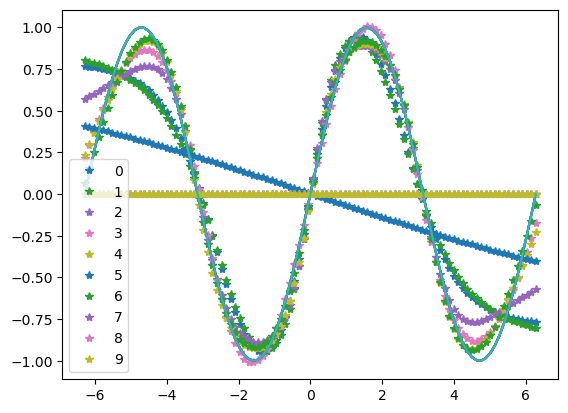

In [26]:
for i in range(10):
    model = ANN(1, 1, i, 3)
    optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay = 1e-2) #adam optimizer
    train_ann(n_epochs = n_epochs , model = model , optimizer = optimizer, loss_fn = loss_fn, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test)
    model.load_state_dict(torch.load('model.pt'))
    x_train_tensor = torch.from_numpy(x_train).float()

    plt.plot(x_train,model(x_train_tensor).detach().numpy(),'*',label = str(i))

    plt.plot(x_train,y_train)
    
    plt.legend()
    

1725527298.644198
1725527309.5237045
1725527320.5326967
1725527331.8419676
1725527342.8010817


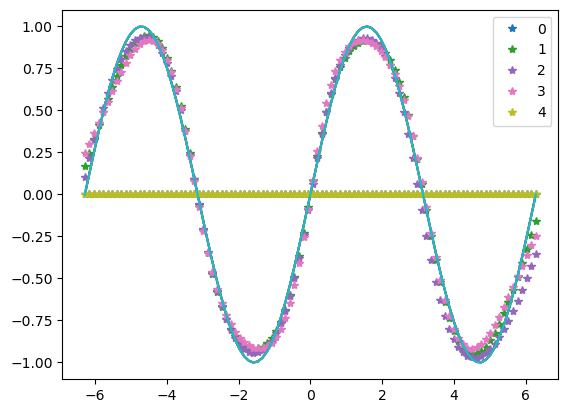

In [12]:
for i in range(5):
    model = ANN(1, 1, 6, i+1)
    optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay = 1e-2) #adam optimizer
    train_ann(n_epochs = n_epochs , model = model , optimizer = optimizer, loss_fn = loss_fn, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test)
    model.load_state_dict(torch.load('model.pt'))
    x_train_tensor = torch.from_numpy(x_train).float()

    plt.plot(x_train,model(x_train_tensor).detach().numpy(),'*',label = str(i))

    plt.plot(x_train,y_train)
    
    plt.legend()

1725527427.9838698
1725527438.7880735
1725527449.9459653
1725527461.18647


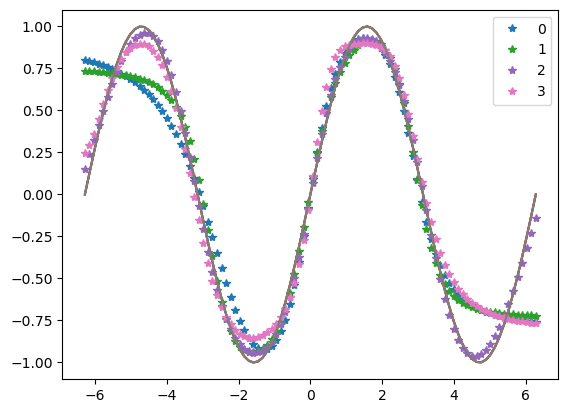

In [13]:

for i in range(4):
    model = ANN(1, 1, 6, i+1)
    optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay = 1e-2) #adam optimizer
    train_ann(n_epochs = n_epochs , model = model , optimizer = optimizer, loss_fn = loss_fn, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test)
    model.load_state_dict(torch.load('model.pt'))
    x_train_tensor = torch.from_numpy(x_train).float()

    plt.plot(x_train,model(x_train_tensor).detach().numpy(),'*',label = str(i))

    plt.plot(x_train,y_train)
    
    plt.legend()

In [ ]:
# 3 nodes working best -  follows Barron result ?!

In [ ]:
error = float('inf')
a,b = 0,0
for i in range(10):
    for j in range(10):
        model = ANN(1, 1, i+1, j+1)
        optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay = 1e-2) #adam optimizer
        train_ann(n_epochs = n_epochs , model = model , optimizer = optimizer, loss_fn = loss_fn, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test)
        model.load_state_dict(torch.load('model.pt'))
        x_train_tensor = torch.from_numpy(x_train).float()
        y_train_tensor = torch.from_numpy(y_train).float()
        pred = model(x_train_tensor)
        if loss_fn(pred,y_train_tensor).detach().numpy() < error:
            error = loss_fn(pred,y_train_tensor).detach().numpy()
            a,b = i,j

print (a,b,error)
        
#         plt.plot(x_train,model(x_train_tensor).detach().numpy(),'*',label = str(i))

#         plt.plot(x_train,y_train)

#         plt.legend()

1725528241.095051
1725528251.109173
1725528261.0225828
1725528270.5423348
1725528280.2289486
1725528290.025227
1725528299.9279692
1725528310.8136244
1725528324.6810992
1725528338.984875
1725528352.4297478
1725528367.035939
1725528380.86903
1725528394.554437
1725528408.5199158


In [ ]:
model.load_state_dict(torch.load('model.pt'))

In [ ]:
x_train_tensor = torch.from_numpy(x_train).float()

plt.plot(x_train,model(x_train_tensor).detach().numpy(),'*')

plt.plot(x_train,y_train)